
--- Logistic Regression (Final Version) ---
Accuracy: 0.6825396825396826
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.69      0.65      0.67        31

    accuracy                           0.68        63
   macro avg       0.68      0.68      0.68        63
weighted avg       0.68      0.68      0.68        63



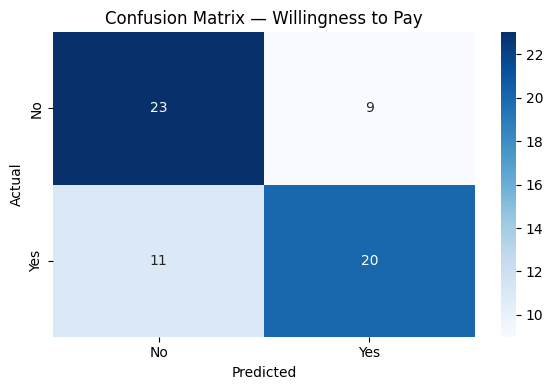

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1 — Load the full encoded dataset
df = pd.read_excel("fully_encoded_dataset_complete.xlsx")

# STEP 2 — Select and rename columns
df_model = df[[
    '33. Would you personally be willing to pay higher energy bills to support more renewable energy development (solar, wind, etc.)?',
    '1. Do you think that global warming is happening?',
    '5. How worried are you about global warming?',
    '7. How much do you think global warming will harm future generations of people?',
    '9. How much do you think global warming will harm people?',
    '13. Fund more research into renewable energy sources, such as solar and wind power.',
    '15. Require fossil fuel companies to pay a carbon tax and use the money to reduce other taxes (such as income tax) by an equal amount.',
    '16. Provide tax rebates for people who purchase energy-efficient vehicles or solar panels.'
]].copy()

df_model.columns = [
    'Willing_To_Pay', 'Belief', 'Worry', 'Harm_Future', 'Harm_People',
    'Support_Research', 'Carbon_Tax', 'Tax_Rebate'
]

# STEP 3 — Drop missing data
df_model = df_model.dropna()

# STEP 4 — Encode target as binary: Willing_To_Pay >= 3 -> 1
df_model['Willing_To_Pay_Binary'] = df_model['Willing_To_Pay'].apply(lambda x: 1 if x >= 3 else 0)

# STEP 5 — Define features and labels
X = df_model.drop(columns=['Willing_To_Pay', 'Willing_To_Pay_Binary'])
y = df_model['Willing_To_Pay_Binary']

# STEP 6 — Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7 — Logistic Regression with class balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 8 — Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# STEP 9 — Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output
print("\n--- Logistic Regression (Final Version) ---")
print("Accuracy:", accuracy)
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Willingness to Pay")
plt.tight_layout()
plt.show()


